In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

df_experiments = pd.read_csv("experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [3]:
from src.utils.analysis.DataFrameEvaluation import get_kendall_tau_experiment_shift_df

df_schedules = pd.read_csv("schedules_v01.csv")

df_kendall = get_kendall_tau_experiment_shift_df(
    df_schedules
)
df_kendall


,Experiment_ID,Shift,Kendall_Tau
0,B-1,2,0.733333
1,B-1,3,0.893334
2,B-1,4,0.806854
3,B-1,5,0.973989
4,B-1,6,1.000000
...,...,...,...
3775,R-99,18,0.992857
3776,R-99,19,0.887231
3777,R-99,20,0.963333
3778,R-99,21,0.837396


## Evaluation

In [4]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_good_low,plot_experiment_boxrow, plot_experiment_lines_compare

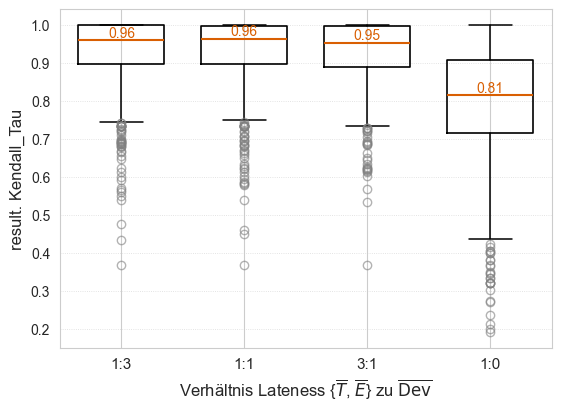

In [15]:
fig, axes = plot_experiment_boxrow(
    df_values=df_kendall,
    df_meta=df_experiments,
    value_col="Kendall_Tau",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {$\overline{T}$, $\overline{E}$} zu $\overline{\mathrm{Dev}}$",
    # optional Facetten, falls gewünscht:
    #col_col="Sim Sigma",
    value_as="result. Kendall_Tau",
    median_fmt = ".2f"
)
plt.show()

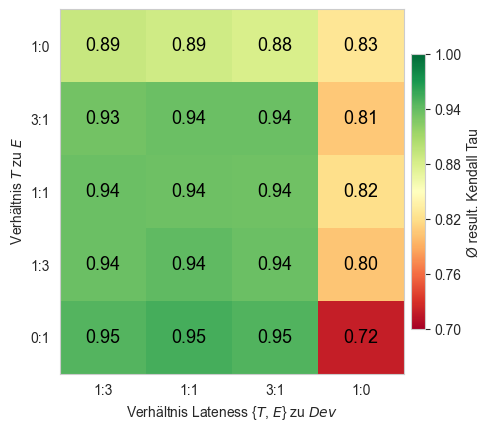

In [11]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_kendall_tau

fig, axes = plot_experiment_heatmaps_kendall_tau(
    df_values=df_kendall,
    df_meta=df_experiments,
    value_col="Kendall_Tau", value_as="Ø result. Kendall Tau",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    y_col="Inner Tardiness Ratio", y_col_as=  r" Verhältnis ${T}$ zu ${E}$",
    vmin=0.7,
    fmt=".2f",
    extend="auto",
    xlabel_at_col = 1,
)

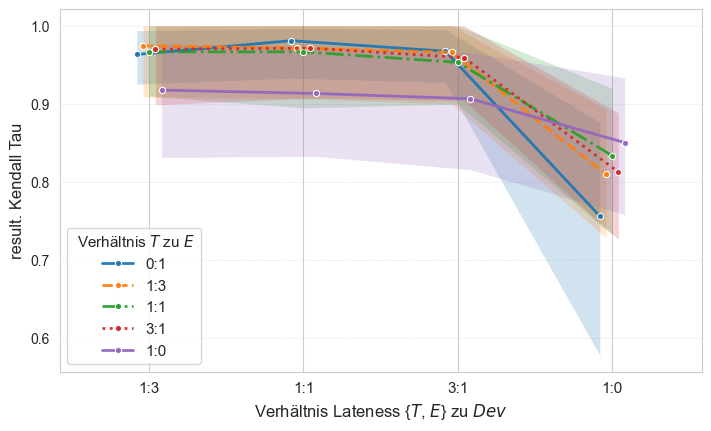

In [12]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_kendall,
    df_meta=df_experiments,
    value_col="Kendall_Tau", value_as="result. Kendall Tau",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Inner Tardiness Ratio", compare_col_as= r" Verhältnis ${T}$ zu ${E}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    compare_col_is_ratio = True,
    dodge = 0.04
)
plt.show()

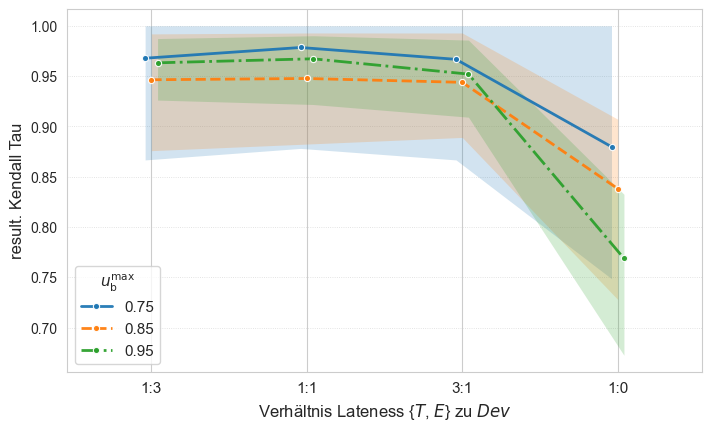

In [13]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_kendall,
    df_meta=df_experiments,
    value_col="Kendall_Tau", value_as="result. Kendall Tau",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Max Bottleneck Utilization",
    compare_col_as=r"$u_{\mathrm{b}}^{\max}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75)
)
plt.show()

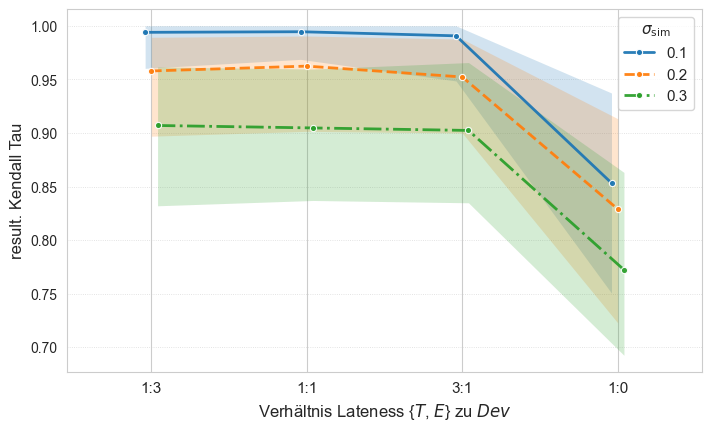

In [14]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_kendall,
    df_meta=df_experiments,
     value_col="Kendall_Tau", value_as="result. Kendall Tau",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Sim Sigma",
    compare_col_as=r"$\sigma_{\mathrm{sim}}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75)
)
plt.show()